In [56]:
# centimeter to inch = centimeter_value / 2.54
import pandas as pd
import matplotlib.pyplot as plt
import random

In [57]:
df = pd.read_csv('datasets/measurements.csv')
df = df.drop(columns=['subject_id'])
df = df / 2.54
df.head()

,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist
0,9.584234,20.827708,13.108030,15.239965,40.364576,10.865785,69.925588,42.538242,32.179699,14.140036,26.728848,22.784565,36.333138,6.578398
1,8.662119,18.410722,11.137390,14.035419,39.076140,9.769045,64.716387,36.271136,29.577661,13.326290,23.835191,20.637134,34.373189,5.981117
2,10.458664,20.979763,12.126362,15.690925,40.311525,10.913305,72.330253,41.749654,33.092727,14.904117,28.348181,20.840191,38.030084,7.061653
3,9.755735,19.321949,13.627210,15.001680,43.765382,11.240319,66.558706,43.121837,29.255998,15.038504,26.982958,23.093179,40.706740,6.704669
4,8.184588,16.625810,9.656355,11.488723,36.861330,8.653165,57.683713,34.304765,26.484197,12.464251,20.746959,16.474387,29.291676,5.952780


### Essential Measurements for difficult measurement (waist and chest) prediction:
#### Chest: 
 - shoulder distance
 - torso height
 - leg length
 - shoulder - torso (will have to add to our dataframe)

#### Waist:
 - Torso height
 - Shoulder distance
 - leg length
 - chest circumference
 - torso height - leg length (need to add)

In [58]:
# Adding a few extra columns as necessary 
df['torso'] = random.choice([0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) * df['shoulder-to-crotch'] # Since no explicit shoulder to waist
df['shoulder-to-torso'] = df['shoulder-breadth'] / df['torso']
df['torso-to-leg-length'] = df['torso'] / df['leg-length']
df


,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,torso,shoulder-to-torso,torso-to-leg-length
0,9.584234,20.827708,13.108030,15.239965,40.364576,10.865785,69.925588,42.538242,32.179699,14.140036,26.728848,22.784565,36.333138,6.578398,22.719521,0.622374,0.706020
1,8.662119,18.410722,11.137390,14.035419,39.076140,9.769045,64.716387,36.271136,29.577661,13.326290,23.835191,20.637134,34.373189,5.981117,20.259913,0.657766,0.684973
2,10.458664,20.979763,12.126362,15.690925,40.311525,10.913305,72.330253,41.749654,33.092727,14.904117,28.348181,20.840191,38.030084,7.061653,24.095954,0.618532,0.728134
3,9.755735,19.321949,13.627210,15.001680,43.765382,11.240319,66.558706,43.121837,29.255998,15.038504,26.982958,23.093179,40.706740,6.704669,22.935514,0.655686,0.783959
4,8.184588,16.625810,9.656355,11.488723,36.861330,8.653165,57.683713,34.304765,26.484197,12.464251,20.746959,16.474387,29.291676,5.952780,17.634916,0.706794,0.665866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,11.025511,17.560172,15.080146,16.944900,48.385617,11.423360,62.523044,49.622039,28.665834,13.933659,24.078974,26.681849,45.520359,7.230346,20.467128,0.680782,0.713990
2014,8.860092,19.823642,9.997872,13.386337,34.610151,9.232215,64.954713,36.478800,30.224423,13.886905,22.982315,18.518284,30.940727,6.222986,19.534968,0.710874,0.646331
2015,10.208698,21.057949,13.272377,14.442534,40.886229,11.285359,73.242722,40.952466,33.648739,15.077535,28.062193,21.496154,35.179505,7.290345,23.852864,0.632106,0.708878
2016,10.075365,22.616275,11.919605,15.159649,39.900868,10.648586,75.488173,38.395832,35.642068,15.137495,28.057092,20.070624,34.002899,6.696160,23.848529,0.634735,0.669112


In [59]:
# High positive is strong correlation, high negative is strong negative correlation, closer to zero is no correlation.
correlation_matrix = df.corr()
print(correlation_matrix)

                        ankle  arm-length     bicep      calf     chest  \
ankle                1.000000    0.564986  0.633259  0.761867  0.652193   
arm-length           0.564986    1.000000  0.259321  0.268386  0.310361   
bicep                0.633259    0.259321  1.000000  0.733878  0.851243   
calf                 0.761867    0.268386  0.733878  1.000000  0.724248   
chest                0.652193    0.310361  0.851243  0.724248  1.000000   
forearm              0.776667    0.459968  0.888790  0.732418  0.809597   
height               0.696257    0.913150  0.375072  0.414201  0.414684   
hip                  0.583440    0.206780  0.803162  0.747231  0.847984   
leg-length           0.521137    0.928655  0.216887  0.236512  0.258911   
shoulder-breadth     0.753634    0.657104  0.670657  0.580747  0.719742   
shoulder-to-crotch   0.778602    0.762108  0.531557  0.545078  0.579490   
thigh                0.575876    0.164011  0.821548  0.794774  0.760533   
waist                0.62

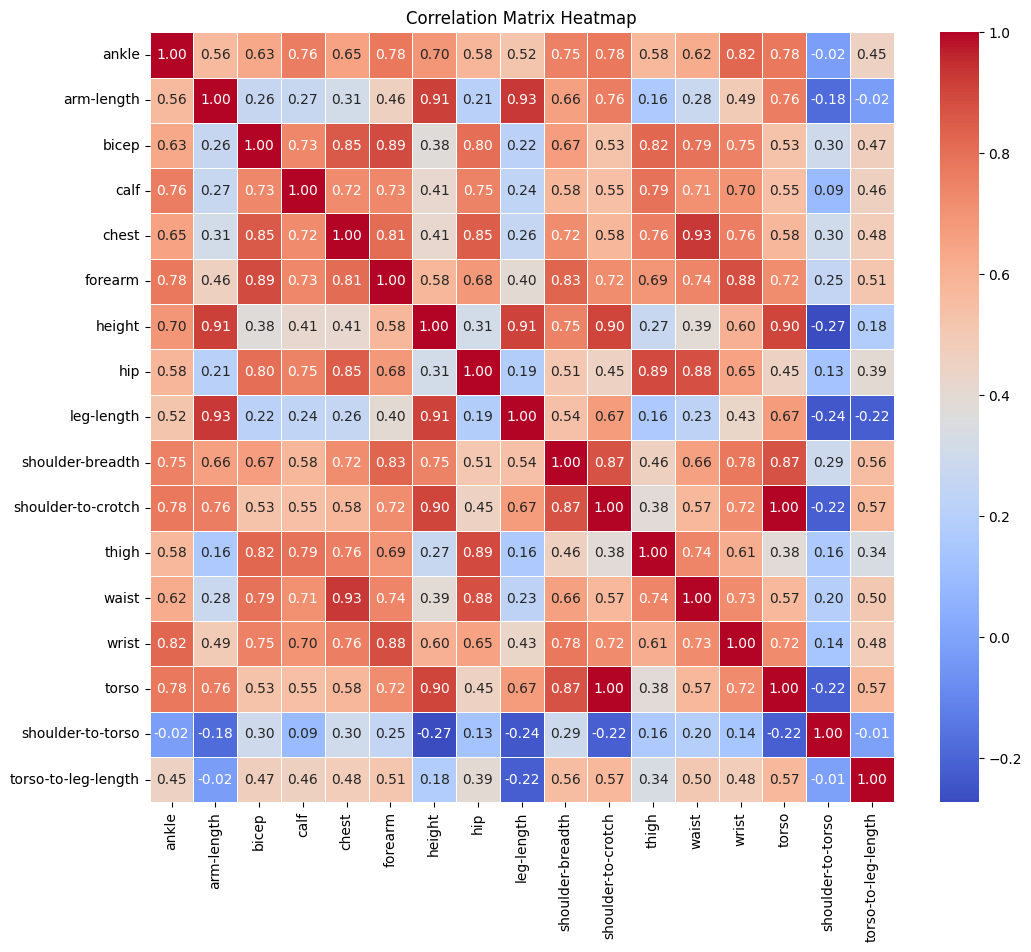

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [61]:
waist_corr = correlation_matrix['waist'].sort_values(ascending=False)
chest_corr = correlation_matrix['chest'].sort_values(ascending=False)

print((chest_corr))
# print(waist_corr)


chest                  1.000000
waist                  0.926662
bicep                  0.851243
hip                    0.847984
forearm                0.809597
thigh                  0.760533
wrist                  0.759588
calf                   0.724248
shoulder-breadth       0.719742
ankle                  0.652193
shoulder-to-crotch     0.579490
torso                  0.579490
torso-to-leg-length    0.482718
height                 0.414684
arm-length             0.310361
shoulder-to-torso      0.302853
leg-length             0.258911
Name: chest, dtype: float64


In [62]:
print(waist_corr)

waist                  1.000000
chest                  0.926662
hip                    0.880308
bicep                  0.793691
forearm                0.744364
thigh                  0.743533
wrist                  0.726042
calf                   0.711414
shoulder-breadth       0.658764
ankle                  0.621294
torso                  0.572474
shoulder-to-crotch     0.572474
torso-to-leg-length    0.504986
height                 0.388765
arm-length             0.278186
leg-length             0.228417
shoulder-to-torso      0.196176
Name: waist, dtype: float64


From the above, we can use
### Waist: 
    - Forearm (0.744)
    - Thigh (0.743)
    - Calf (0.711)
    - Shoulder-breadth (0.658)
    - Torso-leg-length (0.504)

### Chest: 
    - Forearm (0.809)
    - Thigh (0.760)
    - Calf (0.724)
    - Shoulder-Breadth (0.719) 
    - Torso-leg-length ((0.483))

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Example: Your feature DataFrame
X = df[['forearm', 'thigh', 'calf', 'shoulder-breadth', 'torso-to-leg-length']]  

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               Feature         VIF
0              forearm  506.597659
1                thigh  324.665241
2                 calf  470.260932
3     shoulder-breadth  597.892481
4  torso-to-leg-length  299.189298


In [64]:
optimized_df = df.drop(columns=['bicep', 'hip', 'wrist', 'leg-length', 'shoulder-to-torso', 'arm-length', 'height', 'torso', 'shoulder-to-crotch', 'ankle'])
x_train_chest = df[['calf', 'forearm', 'shoulder-breadth', 'thigh']]
x_train_waist = df[['calf', 'forearm', 'shoulder-breadth', 'thigh', 'torso-to-leg-length']]
y_train_chest = df['chest']
y_train_waist = df['waist']

In [65]:
from sklearn.linear_model import RidgeCV

# Specify possible alphas to test
alphas = [0.1, 1, 10, 100, 1000]

# Fit a Ridge regression model with cross-validation
ridge_model = RidgeCV(alphas=alphas)
ridge_model.fit(x_train_waist, y_train_waist)

# Get the best alpha
best_alpha = ridge_model.alpha_
print(f"Optimal Alpha: {best_alpha}")


Optimal Alpha: 0.1


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

print(sklearn.__version__)
# Step 1: Split your data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(x_train_chest, y_train_chest, test_size=0.1, random_state=42)

# Step 2: Create a Ridge regression model with the given alpha
chest_model = Ridge(alpha=10)

# Step 3: Fit the model to the training data
chest_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = chest_model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


1.7.2
Mean Squared Error (MSE): 4.170099938990402
R-squared (R²): 0.7648561318229262


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split your data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(x_train_waist, y_train_waist, test_size=0.1, random_state=42)

# Step 2: Create a Ridge regression model with the given alpha
waist_model = Ridge(alpha=0.1)

# Step 3: Fit the model to the training data
waist_model.fit(X_train, y_train)

print(y_train)
# Step 4: Make predictions on the test set
y_pred = waist_model.predict(X_test)
print(y_pred[0])

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


49      35.524356
210     38.746400
1100    30.388416
1358    33.018962
1244    35.487306
          ...    
1130    39.097133
1294    36.149177
860     34.658702
1459    35.986013
1126    39.835931
Name: waist, Length: 1816, dtype: float64
41.97145081298882
Mean Squared Error (MSE): 7.675384052612015
R-squared (R²): 0.6929363157259993


In [68]:
import pickle

# Save the trained model
with open('models/waist_model.pkl', 'wb') as file:
    pickle.dump(waist_model, file)

In [69]:
with open('models/chest_model.pkl', 'wb') as file:
    pickle.dump(chest_model, file)